# DL Multi-class Classification
##### https://www.youtube.com/watch?v=2WdPdE2hq78&t=630s
#### YT Part 07 - Constructing a Multi-Class Classifier Using Neural Network with Python (Tensorflow Keras)

### Multi-Class Classification with Tensorflow and Keras Deep Learning Libraries
1. Construct a multi-layer neural netword model
2. Tune the hyper-parameter for training a model
3. Evaluate the model

#### Iris Dataset
https://archive.ics.uci.edu/ml/datasets/iris

#### Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

### Download the data and then convert it to pandas dataframe to analyze it

In [1]:
# Tensorflow and Keras are two packages for creating NN models.
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# import NN layers and Other components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns # for plotting

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
tf.random.set_seed(13) # to make sure the experiment is reproducible 
tf.debugging.set_log_device_placement(False)

In [3]:
all_ds = pd.read_csv('iris.csv')
all_ds

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (150, 5)


In [5]:
# Summary of information on the dataset
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Clearning the data

In [6]:
print("Display NA values in each row: ")
all_ds.isna().sum(axis=1)

Display NA values in each row: 


0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [7]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
### To Clean the data
# Remove the rows with NA values.

all_ds = all_ds.dropna()

### You can also use the following line to fill the NA with Zeroes
# allall_ds = allall_ds.fillna(0)
# all_ds = all_ds.fillna(mean_of_column)

### Shuffle the rows, make sure data is sorted

In [9]:
all_ds = all_ds.sample(frac=1) # Shuffle the rows, make sure data us sorted

### Split the data in train and test split

In [10]:
# Split the data into 80% train and 20% test (later will divide the test data into test and validate)
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.2)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(120, 5)
(30, 5)


In [11]:
# split the test_dataset into test(50%) and validate(50%)
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape)
print( valid_dataset.shape)

(15, 5)
(15, 5)


In [12]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset\t\t: {train_dataset.shape}")
print(f" Test dataset\t\t: {test_dataset.shape}")
print(f" Validate dataset\t: {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset		: (120, 5)
 Test dataset		: (15, 5)
 Validate dataset	: (15, 5)


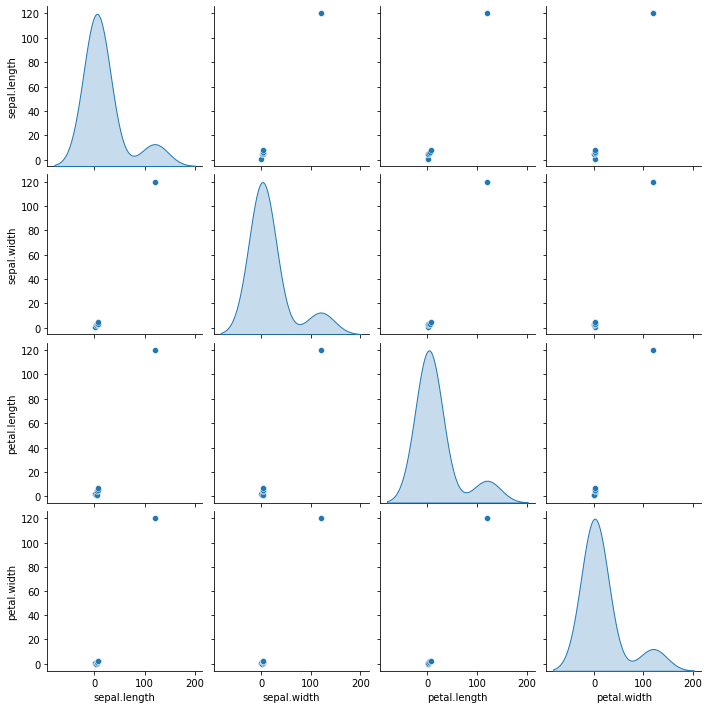

In [13]:
# Plot the relationship between any two variables to spot anything incorrect
train_stats = train_dataset.describe()
#train_stats.pop("variety")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind="reg"

In [14]:
# Statistics on the train dataset to make sure it is in good shape (Could display same for test and validate)
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal.length,120.0,5.875000,0.841692,4.3,5.1,5.85,6.425,7.9
sepal.width,120.0,3.024167,0.432696,2.0,2.8,3.00,3.300,4.4
petal.length,120.0,3.922500,1.716576,1.0,1.6,4.50,5.100,6.9
petal.width,120.0,1.272500,0.753364,0.1,0.4,1.40,1.825,2.5


In [15]:
train_labels1 = train_dataset.pop('variety')
test_labels1 = test_dataset.pop('variety')
valid_labels1 = valid_dataset.pop('variety')

In [16]:
# Encode the labels
train_labels = pd.get_dummies(train_labels1, prefix="Label")
test_labels = pd.get_dummies(test_labels1, prefix="Label")
valid_labels = pd.get_dummies(valid_labels1, prefix="Label")

In [17]:
train_labels

,Label_Setosa,Label_Versicolor,Label_Virginica
81,0,1,0
70,0,1,0
108,0,0,1
130,0,0,1
95,0,1,0
...,...,...,...
8,1,0,0
24,1,0,0
52,0,1,0
111,0,0,1


In [18]:
test_labels

,Label_Setosa,Label_Versicolor,Label_Virginica
79,0,1,0
82,0,1,0
75,0,1,0
72,0,1,0
30,1,0,0
18,1,0,0
21,1,0,0
31,1,0,0
122,0,0,1
35,1,0,0


## Data Normalization/Scaling 
### Subtract the mean of the training data and divide by the standard deviation of the training data

In [19]:
# define a function to normalize the data set
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_data = norm(valid_dataset)

In [20]:
# show  a sample of the data after normalized
normed_train_data.head(10)

,sepal.length,sepal.width,petal.length,petal.width
81,-0.445531,-1.442505,-0.129619,-0.361711
70,0.029702,0.406367,0.511192,0.700193
108,0.980169,-1.211396,1.093747,0.700193
130,1.811827,-0.518069,1.268514,0.832931
95,-0.207915,-0.055851,0.161659,-0.096235
22,-1.514806,1.330802,-1.702517,-1.423615
139,1.217785,0.175258,0.860725,1.098407
53,-0.445531,-1.673614,0.045148,0.036503
105,2.049443,-0.055851,1.559791,1.098407
123,0.504935,-0.749178,0.569448,0.700193


## Build the NN Model

In [21]:
%%time

# We declared a function for creating a model
def build_model_two_layers():
    model = Sequential()
    model.add(Dense(16, input_shape=(normed_train_data.shape[1], ))) # Input layer => input_shape must be mentioned explicitly 
    model.add(Dense(3, activation='softmax'))                        # Output layer 
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLu
    # Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', #from_logits=True),
                  optimizer=optimizer,
                  metrics=['accuracy'])    # for regression problems, mean squared error(MSE) is often employed
    return model

EPOCHS = 100
batch_size = 16 # approx 6 iteration

model = build_model_two_layers()
print('Here is a summary of this model: ')
model.summary()

#with tf.device('/CPU:0'):
with tf.device('/GPU:0'):
    history = model.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=1,
        shuffle=True,
        steps_per_epoch=int(normed_train_data.shape[0] / batch_size),
        validation_data= (normed_valid_data,valid_labels)
    )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 17ms/step - loss: 1.1370 - accuracy: 0.3135 - val_loss: 1.0859 - val_accuracy: 0.3333
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1037 - accuracy: 0.4084 - val_loss: 1.0761 - val_accuracy: 0.3333
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.4411 - val_loss: 1.0666 - val_accuracy: 0.3333
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - los

In [22]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.628070,0.807692,0.554052,0.866667,95
96,0.624809,0.794643,0.551296,0.866667,96
97,0.624146,0.788462,0.548530,0.866667,97
98,0.628993,0.769231,0.545875,0.866667,98
99,0.594015,0.875000,0.543232,0.866667,99


In [23]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[0.29026422, 0.43310183, 0.27663395],
       [0.2547017 , 0.4159941 , 0.3293042 ],
       [0.12765028, 0.4534576 , 0.41889212],
       [0.1029313 , 0.49846372, 0.39860502],
       [0.7594083 , 0.1544421 , 0.0861496 ],
       [0.65959305, 0.19473208, 0.14567487],
       [0.7946531 , 0.10871094, 0.09663595],
       [0.69401944, 0.18325664, 0.12272388],
       [0.01442983, 0.47819877, 0.5073714 ],
       [0.76784945, 0.14949284, 0.08265767]], dtype=float32)

## See how the training went

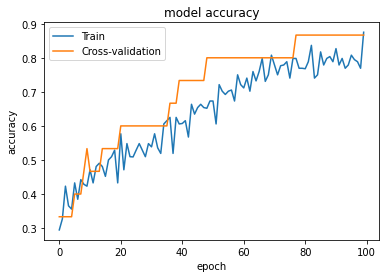

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-validation'], loc='upper left')
plt.show()

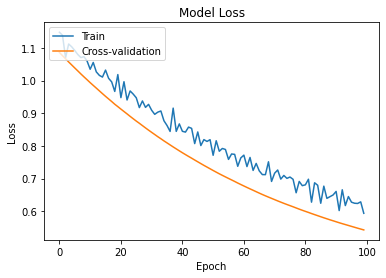

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-validation'], loc='upper left')
plt.show()

In [26]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose = 1)
print("Accuracy\t: {:5.2f} ".format(accuracy))

Train Split: 
4/4 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7917
Accuracy	:  0.79 


In [27]:
print('Evaluation Split: ')
loss, accuracy = model.evaluate(normed_valid_data, valid_labels, verbose=2)
print("Accuracy\t: {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 0.5432 - accuracy: 0.8667
Accuracy	:  0.87 


In [28]:
print('Evaluation Split: ')
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Accuracy\t: {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 0.5014 - accuracy: 0.9333
Accuracy	:  0.93 


ValueError: Found input variables with inconsistent numbers of samples: [3, 15]

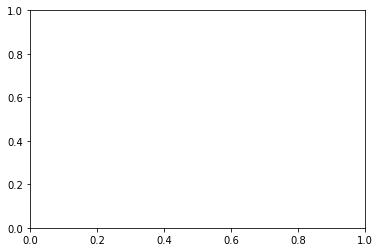

In [35]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)
# Labels need to be converted to Numbers 
sns.heatmap(cm, annot=True, ax = ax); #annot = True to annotate cells

# labels, titles and tricks 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')